In [1]:
import os
os.chdir('/home/gebhart/projects/rfunklab/network_structure')
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval as make_tuple
from network_structure.homology_parser import *
import persim

In [2]:
data_loc = '/home/gebhart/projects/rfunklab/data/patents_20190722'
collab_file = 'collaboration.homology'
knowl_file = 'knowledge.homology'

In [3]:
collab_intervals = parse_intervals(os.path.join(data_loc, collab_file))
collab_bettis = parse_betti(os.path.join(data_loc,collab_file))
collab_cell_counts = parse_cell_counts(os.path.join(data_loc,collab_file))
collab_euler_characteristic = parse_euler_characteristic(os.path.join(data_loc,collab_file))

In [4]:
knowl_intervals = parse_intervals(os.path.join(data_loc, knowl_file))
knowl_bettis = parse_betti(os.path.join(data_loc,knowl_file))
knowl_cell_counts = parse_cell_counts(os.path.join(data_loc,knowl_file))
knowl_euler_characteristic = parse_euler_characteristic(os.path.join(data_loc,knowl_file))

In [5]:
print(collab_bettis, knowl_bettis)

[959, 175, 8, 0, 0] [225, 277, 15, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
print(collab_cell_counts, knowl_cell_counts)

[9852, 10001, 1059, 127, 9, 0] [3925, 10001, 18927, 40924, 87118, 182104, 360627, 635765, 958749, 1216330, 1290209, 1140201, 835756, 504562, 248200, 97886, 30211, 7030, 1160, 121, 6, 0]


In [7]:
def interval_to_numpy(interval):
    if len(interval) > 1:
        return np.array([list(ival) if len(ival) > 1 else [ival[0],np.inf] for ival in interval])            
    return np.array([])

In [8]:
def plot_diagram(diagram, title=''):
    fig, ax = plt.subplots()
    if diagram.size > 0:
        d = diagram[~np.isinf(diagram[:,1])]
        if d.shape[0] > 0:
            ax.scatter(d[:,0], d[:,1], s=25, c=d[:,0]**2 - d[:,1], cmap=plt.cm.coolwarm, zorder=10)
            lims = [
                np.min(d[:,0]-1),  # min of both axes
                np.max(d[:,1]+1),  # max of both axes
            ]

            # now plot both limits against eachother
            ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
            ax.set_xlim(lims)
            ax.set_ylim(lims)
    ax.set_aspect('equal')
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.title(title)

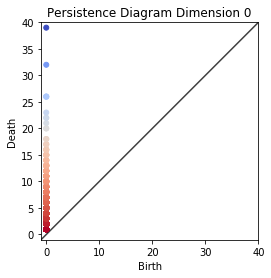

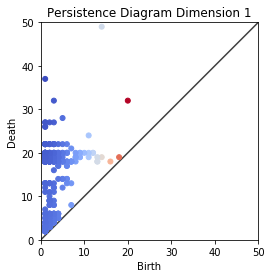

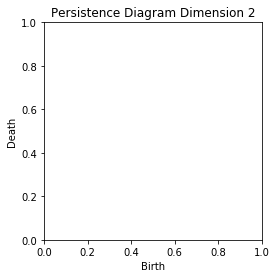

In [9]:
for i in range(len(collab_intervals)):
    npint = interval_to_numpy(collab_intervals[i])
    if npint.size > 0:
        plot_diagram(npint, title='Persistence Diagram Dimension {}'.format(i))

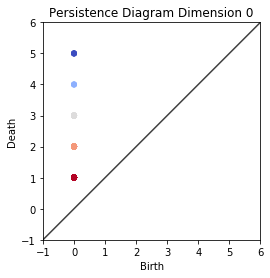

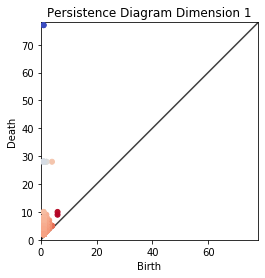

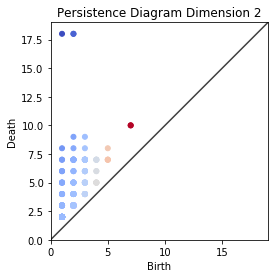

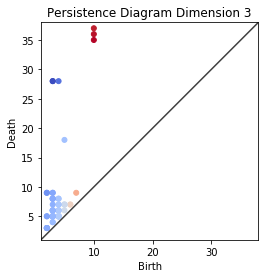

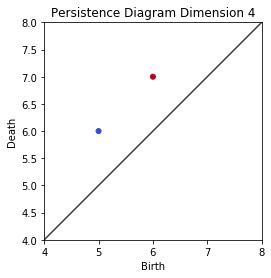

In [10]:
for i in range(len(knowl_intervals)):
    npint = interval_to_numpy(knowl_intervals[i])
    if npint.size > 0:
        plot_diagram(npint, title='Persistence Diagram Dimension {}'.format(i))

In [11]:
for i in range(len(collab_intervals)-1):
    print(persim.bottleneck(interval_to_numpy(collab_intervals[i]), interval_to_numpy(knowl_intervals[i])))

19.5
38.0
0.5


IndexError: too many indices for array